## Caso 1:  $k(x) = 20x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N=11
W = np.zeros([N,N]) #Pesos de los arcos
W[0,1] = 100
W[0,2] = np.inf
W[0,3] = 100
W[1,2] = 50
W[1,4] = 100
W[1,5] = 100
W[2,3] = np.inf
W[2,5] = np.inf
W[3,5] = 50
W[3,6] = 60
W[4,5] = np.inf
W[4,7] = 100
W[5,7] = 80
W[5,8] = 100
W[5,6] = np.inf
W[6,8] = 80
W[6,9] = 80
W[7,8] = 50
W[7,10] = 80
W[8,10] = 50
W[8,9] = 50
W[9,10] = np.inf

k = lambda x: 20*x
b = lambda x: 150*x - (x**2)/2

c = np.zeros([N,N]) #Definición de los costos
for i in range(N):
    for j in range(N):
        if W[i,j] == np.inf:
            c[i,j] = 2

Vint = np.zeros(N,dtype = list) #Corte de entrada para cada nodo
Vout = np.zeros(N,dtype = list) #Corte de salida para cada nodo

for i in range(N):
    vin = []
    vout = []
    for j in range(N):
        if W[j,i] != 0:
            vin.append(j)
        if W[i,j] != 0:
            vout.append(j)
    Vint[i] = vin
    Vout[i] = vout

def objetivo(V):
    '''
    Inicialmente era para una matrix de NxN pero para ser utilizado en el algoritmo de optimizacion
    modificamos esta matriz a un vector de N^2, luego recuperamos la matriz dentro de la función
    '''
    X = V.reshape([N,N])
    x = np.sum([X[i,10] for i in Vint[10]])
    costo = np.sum([c[i,j]*X[i,j] for j in range(N) for i in range(N)])
    return -(b(x) - k(x) - costo)

##### Modelo scipy

## Cotas:
lb = np.zeros([N,N]).reshape(N*N)
ub = W.reshape(N*N)
B = list(zip(lb,ub))

## Restricciones:
cons = []
for i in range(1,N-1):
    def f(V, i=i):
        X = V.reshape([N,N])
        return np.sum([X[k,i] for k in Vint[i]]) - np.sum([X[i,k] for k in Vout[i]])
    cons.append( {'type':'eq', 'fun':f})
    
def g(V):
    X = V.reshape([N,N])
    if np.sum([X[i,8] for i in Vint[8]]) != 0:
        return np.sum([X[i,5] for i in Vint[5]])
    elif np.sum([X[i,5] for i in Vint[5]]) != 0:
        return np.sum([X[i,8] for i in Vint[8]])
    else:
        return X[10,10]

cons.append( {'type':'eq', 'fun':g})
    
minimo = minimize(objetivo, np.zeros(N*N), bounds = B , constraints = cons)

xmin = minimo.x.reshape([N,N])
for i in range(N):
    for j in range(N):
        if round(xmin[i,j]) != 0:
            print('Variable x_'+str(i+1)+'-'+str(j+1)+' = ', round(xmin[i,j]))


print('Valor objetivo: ', -1*round(minimo.fun))

Variable x_1-2 =  89.0
Variable x_1-4 =  41.0
Variable x_2-5 =  89.0
Variable x_4-7 =  41.0
Variable x_5-8 =  89.0
Variable x_7-9 =  41.0
Variable x_8-9 =  9.0
Variable x_8-11 =  80.0
Variable x_9-11 =  50.0
Valor objetivo:  8450


## Gráfico del flujo

In [2]:
import networkx as nx
G = nx.Graph()
G.add_node(1, pos = (0,1))
G.add_node(2, pos = (1,2))
G.add_node(3, pos = (1,1))
G.add_node(4, pos = (1,0))
G.add_node(5, pos = (2,2))
G.add_node(6, pos = (2,1))
G.add_node(7, pos = (2,0))
G.add_node(8, pos = (3,2))
G.add_node(9, pos = (3,1))
G.add_node(10, pos = (3,0))
G.add_node(11, pos = (4,1))

for i in range(N):
    for j in range(N):
        if W[i,j] != 0.:
            if round(xmin[i,j]) != 0:
                G.add_edge(i+1,j+1, weight= round(xmin[i,j]))
#             else:
#                 G.add_edge(i+1,j+1, weight= round(xmin[i,j]))

{(1, 2): Text(0.5, 1.5, '89.0'),
 (1, 4): Text(0.5, 0.5, '41.0'),
 (2, 5): Text(1.5, 2.0, '89.0'),
 (4, 7): Text(1.5, 0.0, '41.0'),
 (5, 8): Text(2.5, 2.0, '89.0'),
 (7, 9): Text(2.5, 0.5, '41.0'),
 (8, 9): Text(3.0, 1.5, '9.0'),
 (8, 11): Text(3.5, 1.5, '80.0'),
 (9, 11): Text(3.5, 1.0, '50.0')}

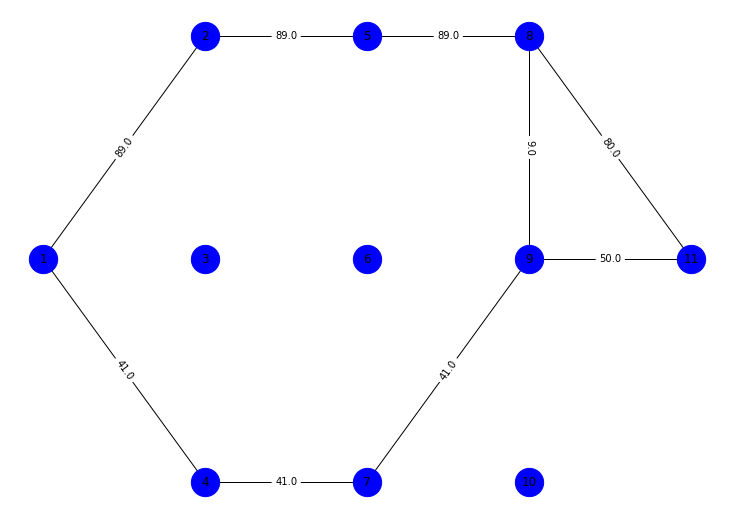

In [4]:
plt.figure(figsize = (10,7))
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, node_color = 'b',with_labels=True, node_size = 800)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


## Caso 2: $k(x) = 40x$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N=11
W = np.zeros([N,N]) #Pesos de los arcos
W[0,1] = 100
W[0,2] = np.inf
W[0,3] = 100
W[1,2] = 50
W[1,4] = 100
W[1,5] = 100
W[2,3] = np.inf
W[2,5] = np.inf
W[3,5] = 50
W[3,6] = 60
W[4,5] = np.inf
W[4,7] = 100
W[5,7] = 80
W[5,8] = 100
W[5,6] = np.inf
W[6,8] = 80
W[6,9] = 80
W[7,8] = 50
W[7,10] = 80
W[8,10] = 50
W[8,9] = 50
W[9,10] = np.inf

k = lambda x: 40*x
b = lambda x: 150*x - (x**2)/2

c = np.zeros([N,N]) #Definición de los costos
for i in range(N):
    for j in range(N):
        if W[i,j] == np.inf:
            c[i,j] = 2

Vint = np.zeros(N,dtype = list) #Corte de entrada para cada nodo
Vout = np.zeros(N,dtype = list) #Corte de salida para cada nodo

for i in range(N):
    vin = []
    vout = []
    for j in range(N):
        if W[j,i] != 0:
            vin.append(j)
        if W[i,j] != 0:
            vout.append(j)
    Vint[i] = vin
    Vout[i] = vout

def objetivo(V):
    '''
    Inicialmente era para una matrix de NxN pero para ser utilizado en el algoritmo de optimizacion
    modificamos esta matriz a un vector de N^2, luego recuperamos la matriz dentro de la función
    '''
    X = V.reshape([N,N])
    x = np.sum([X[i,10] for i in Vint[10]])
    costo = np.sum([c[i,j]*X[i,j] for j in range(N) for i in range(N)])
    return -(b(x) - k(x) - costo)

##### Modelo scipy

## Cotas:
lb = np.zeros([N,N]).reshape(N*N)
ub = W.reshape(N*N)
B = list(zip(lb,ub))

## Restricciones:
cons = []
for i in range(1,N-1):
    def f(V, i=i):
        X = V.reshape([N,N])
        return np.sum([X[k,i] for k in Vint[i]]) - np.sum([X[i,k] for k in Vout[i]])
    cons.append( {'type':'eq', 'fun':f})
    
def g(V):
    X = V.reshape([N,N])
    if np.sum([X[i,8] for i in Vint[8]]) != 0:
        return np.sum([X[i,5] for i in Vint[5]])
    elif np.sum([X[i,5] for i in Vint[5]]) != 0:
        return np.sum([X[i,8] for i in Vint[8]])
    else:
        return X[10,10]

cons.append( {'type':'eq', 'fun':g})
    
minimo = minimize(objetivo, np.zeros(N*N), bounds = B , constraints = cons)

xmin = minimo.x.reshape([N,N])
for i in range(N):
    for j in range(N):
        if round(xmin[i,j]) != 0:
            print('Variable x_'+str(i+1)+'-'+str(j+1)+' = ', round(xmin[i,j]))


print('Valor objetivo: ', -1*round(minimo.fun))

Variable x_1-2 =  62.0
Variable x_1-4 =  48.0
Variable x_2-5 =  62.0
Variable x_4-7 =  48.0
Variable x_5-8 =  62.0
Variable x_7-9 =  48.0
Variable x_8-9 =  1.0
Variable x_8-11 =  61.0
Variable x_9-11 =  49.0
Valor objetivo:  6050


## Gráfico del flujo

In [6]:
G = nx.Graph()
G.add_node(1, pos = (0,1))
G.add_node(2, pos = (1,2))
G.add_node(3, pos = (1,1))
G.add_node(4, pos = (1,0))
G.add_node(5, pos = (2,2))
G.add_node(6, pos = (2,1))
G.add_node(7, pos = (2,0))
G.add_node(8, pos = (3,2))
G.add_node(9, pos = (3,1))
G.add_node(10, pos = (3,0))
G.add_node(11, pos = (4,1))

for i in range(N):
    for j in range(N):
        if W[i,j] != 0.:
            if round(xmin[i,j]) != 0:
                G.add_edge(i+1,j+1, weight= round(xmin[i,j]))

{(1, 2): Text(0.5, 1.5, '62.0'),
 (1, 4): Text(0.5, 0.5, '48.0'),
 (2, 5): Text(1.5, 2.0, '62.0'),
 (4, 7): Text(1.5, 0.0, '48.0'),
 (5, 8): Text(2.5, 2.0, '62.0'),
 (7, 9): Text(2.5, 0.5, '48.0'),
 (8, 9): Text(3.0, 1.5, '1.0'),
 (8, 11): Text(3.5, 1.5, '61.0'),
 (9, 11): Text(3.5, 1.0, '49.0')}

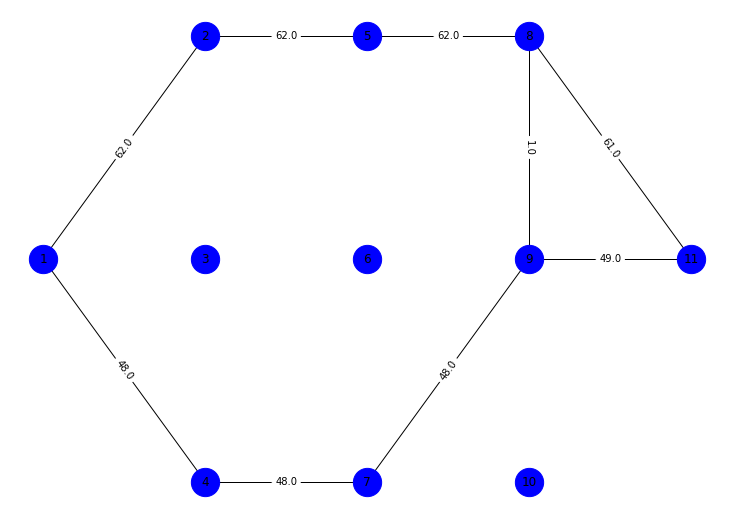

In [7]:
plt.figure(figsize = (10,7))
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, node_color = 'b',with_labels=True, node_size = 800)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
